In [18]:
import os
os.chdir("G:\python_training\python\python casestudy\logistic")
os.getcwd()

'G:\\python_training\\python\\python casestudy\\logistic'

In [19]:
import numpy as np
import pandas as pd

from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

##import SKlearn packages
import sklearn
from sklearn.preprocessing import StandardScaler ## to perform scaling
from sklearn.linear_model import LogisticRegression ## for logistic regression model
from sklearn.model_selection import train_test_split ## for splitting the dataset
from sklearn import metrics
from sklearn import preprocessing


In [64]:
df = pd.read_csv('bank_add_full.csv', header=0)
df =df.dropna()
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [79]:
##selecting numeric coloumns
newdf = df.select_dtypes([np.number])

newdf.head()
##finding coorelation
newdf.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,-0.067523,0.030045,0.053008,0.040889,0.019027,-0.021356,0.019137,-0.023671,-0.016376,0.035626
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,0.008054,-0.015941,0.015454,0.018011,-0.023068,0.014666,0.004140,0.014537,-0.011665,0.044876
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,-0.032704,-0.079028,-0.049126,-0.033953,0.014405,0.005141,-0.025125,-0.021088,0.087645,-0.050893
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.070690,-0.016946,-0.128677,-0.154629,0.001031,-0.008186,-0.007300,0.001021,0.491353,-0.950700
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.012534,0.081050,0.127754,0.157651,-0.002012,0.001512,0.000090,-0.003929,-0.878776,0.524045
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,...,-0.111356,-0.105917,-0.213706,-0.170366,-0.018139,-0.007673,0.014582,0.026797,0.472501,-0.256886
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,...,-0.057274,-0.215273,-0.092174,-0.046905,0.001273,-0.017143,0.001216,0.012479,0.304264,-0.077416
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,...,-0.011740,-0.052892,0.170425,0.169175,-0.041382,-0.027877,0.050033,0.023711,0.099724,0.084824
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,...,-0.133859,0.019524,-0.185937,-0.190321,-0.023279,-0.013757,0.022732,0.030201,0.488406,-0.281022
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,...,-0.171782,0.027593,-0.273236,-0.292156,-0.017433,-0.002658,0.009923,0.023272,0.493051,-0.350613


In [56]:
print(df.shape)
df.describe()

(41188, 21)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

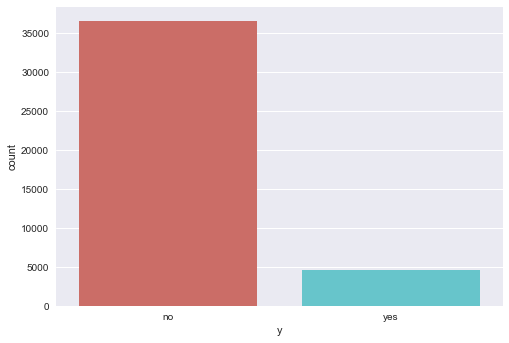

In [29]:
sb.countplot(x='y',data=df,palette='hls')
plt.show()

In [66]:
 ## education column of the dataset has many categories we  reduce the categories  
df['education'].unique()

## we group “basic.4y”, “basic.9y” and “basic.6y” as “basic”.

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [67]:
df['education']=np.where(df['education']=='basic.4y','basic',df['education'])
df['education']=np.where(df['education']=='basic.6y','basic',df['education'])
df['education']=np.where(df['education']=='basic.9y','basic',df['education'])

In [59]:
df['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [31]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [68]:
##creating dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var,drop_first=True)
    df1=df.join(cat_list)
    df=df1
    

In [69]:
## converting strings to factors
category = {'yes':1,'no':0}
df['y'] = df['y'].map(category)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 62 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
5,45,services,married,basic,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0


In [70]:
##to see columns in dataframe

data_vars=df.columns.values.tolist()
print(data_vars)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


In [71]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [72]:
df_final=df[to_keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [73]:
## splitting dependant and independant variables
df_final_vars=df_final.columns.values.tolist()
Y=['y']
X=[i for i in df_final_vars if i not in Y]

X=df_final[X]
Y=df_final[Y]

X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


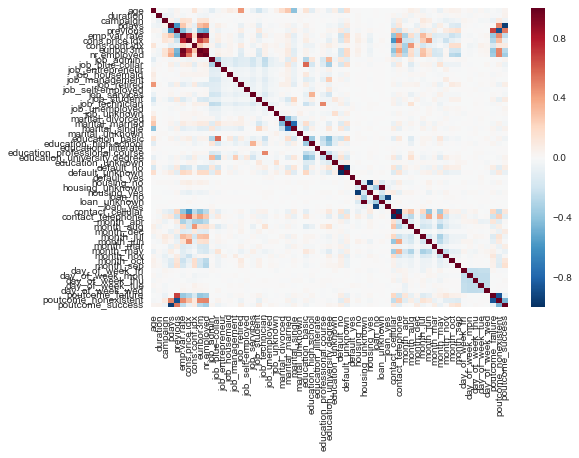

In [76]:
sb.heatmap(X.corr())
plt.show()

In [74]:
##splitting into traina nd test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.30,random_state=0)

In [75]:
Xtrain.shape


(28831, 51)

In [76]:
classifier = LogisticRegression(random_state=0)
classifier.fit(Xtrain, Ytrain)

C:\Users\personal u\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
import statsmodels.api as sm
X=sm.add_constant(Xtrain)
logit_model = sm.Logit(Ytrain.astype(float),X.astype(float)).fit()



         Current function value: 0.207709
         Iterations: 35


C:\Users\personal u\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [78]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28780
Method:                           MLE   Df Model:                           50
Date:                Mon, 29 Jan 2018   Pseudo R-squ.:                  0.4105
Time:                        21:41:55   Log-Likelihood:                -5988.4
converged:                      False   LL-Null:                       -10158.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -268.7636     46.343     -5.799      0.000    -359.594    -177.933
age                              -0.0016      0.003     -0.547      0.585      -0.007       0.004
duration                          0.0047    8.9e-05     52.526      0.000       0.005       0.005
campaign                         -0.0400      0.014     -2.853      0.004      -0.067      -0.013
pdays                            -0.0012      0.000     -4.737      0.000      -0.002      -0.001
previous                         -0.0816      0.070     -1.169      0.243      -0.219       0.055
emp.var.rate                     -1.8963      0.171    -11.066      0.000      -2.232      -1.560
cons.price.idx                    2.4229      0.306      7.928      0.000       1.824       3.022
cons.conf.idx                     0.0227      0.009      2.447      0.014       0.005       0.041
euribor3m                         0.3141      0.155      2.032      0.042       0.011       0.617
nr.employed                       0.0075      0.004      1.999      0.046       0.000       0.015
job_blue-collar                  -0.2624      0.096     -2.735      0.006      -0.450      -0.074
job_entrepreneur                  0.0719      0.143      0.501      0.616      -0.209       0.353
job_housemaid                     0.1104      0.170      0.648      0.517      -0.223       0.444
job_management                    0.1508      0.100      1.509      0.131      -0.045       0.347
job_retired                       0.3067      0.127      2.412      0.016       0.058       0.556
job_self-employed                -0.0988      0.142     -0.695      0.487      -0.377       0.180
job_services                     -0.1080      0.104     -1.043      0.297      -0.311       0.095
job_student                       0.1996      0.134      1.492      0.136      -0.063       0.462
job_technician                    0.0173      0.085      0.203      0.839      -0.150       0.184
job_unemployed                    0.0668      0.154      0.434      0.664      -0.235       0.368
job_unknown                      -0.2715      0.297     -0.915      0.360      -0.853       0.310
marital_married                   0.0383      0.082      0.466      0.641      -0.122       0.199
marital_single                    0.0632      0.094      0.675      0.500      -0.120       0.247
marital_unknown                   0.0676      0.515      0.131      0.896      -0.942       1.077
education_high.school            -0.0222      0.083     -0.269      0.788      -0.184       0.140
education_illiterate              1.0670      0.905      1.179      0.238      -0.707       2.841
education_professional.course     0.0195      0.098      0.198      0.843      -0.173       0.212
education_university.degree       0.1025      0.083      1.235      0.217      -0.060       0.265
education_unknown                 0.1118      0.125      0.892      0.372      -0.134       0.357
default

In [40]:
classifier.coef_

array([[ -4.31710470e-04,   4.59162633e-03,  -4.69693084e-02,
         -1.69516989e-03,  -6.61393233e-02,  -4.54577891e-01,
          3.94574748e-01,   1.38866574e-02,   2.90456268e-02,
         -7.53029029e-03,  -2.64335744e-01,   5.40850262e-03,
          2.09392520e-02,   1.00211267e-01,   2.36467536e-01,
         -7.32422095e-02,  -1.25043944e-01,   1.86845408e-01,
         -2.87563020e-02,   3.31672809e-02,  -3.18905216e-02,
          5.59435995e-02,   5.93990736e-02,   2.73915167e-03,
         -2.26418152e-02,   1.55753558e-02,   3.54884898e-03,
          2.75955083e-02,   1.04851299e-01,  -2.32565385e-01,
         -1.83425639e-04,  -7.13293983e-02,  -1.52637645e-02,
         -7.13293983e-02,  -8.99511406e-02,  -2.57594536e-01,
          2.66115104e-01,   2.79545538e-02,   1.70709588e-01,
          1.80769054e-01,   8.62109547e-01,  -7.02020575e-01,
         -3.39929829e-01,  -6.01139615e-03,  -1.74337112e-01,
         -4.54027968e-02,   1.28809707e-01,   1.86578394e-01,
        

In [41]:
classifier.intercept_

array([ 0.00285833])

In [34]:
ypred = classifier.predict(Xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest, ypred)
print(confusion_matrix)

[[10681   288]
 [  802   586]]


In [43]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(Xtest, Ytest)))

Accuracy of logistic regression classifier on test set: 0.91


In [38]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, ypred))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95     10969
        yes       0.67      0.42      0.52      1388

avg / total       0.90      0.91      0.90     12357

